# Imports and Utility Variables

In [65]:
import os
import datetime

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.timeseries import TimeSeries
from astropy.table import Table, vstack, MaskedColumn, unique
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation

import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

ITURBIDE_DATA_FILE_PATH = "/home/ramon/uanl/thesis/Backup Data/Iturbide/ATOJ339.9469+45.1464_SPM.dat"
GAIA_EPOCH_PHOTOMETRY_CSV_PATH = "/home/ramon/uanl/thesis/Backup Data/Gaia Epoch Photometry - Indiv/DR3/rel-norm-flux.ecsv"
# ZTF_G_DATA_PATH = "/home/ramon/uanl/thesis/Backup Data/IRSA/rel-zg-flux.ecsv"
# ZTF_R_DATA_PATH = "/home/ramon/uanl/thesis/Backup Data/IRSA/rel-zr-flux.ecsv"
ZTF_G_DATA_PATH = "/home/ramon/uanl/thesis/Backup Data/IRSA/zg-zpflux.ecsv"
ZTF_R_DATA_PATH = "/home/ramon/uanl/thesis/Backup Data/IRSA/zr-zpflux.ecsv"

ITURBIDE_OUTPUT_PATH = "/home/ramon/uanl/thesis/Backup Data/Iturbide/cleaned-iturbide.ecsv"
CLEANED_ZTF_OUTPUT_PATH = "/home/ramon/uanl/thesis/Backup Data/IRSA/cleaned-ztf-flux.ecsv"

In [66]:
objCoord = SkyCoord.from_name("ATO J339.9469+45.1464")
objCoord

<SkyCoord (ICRS): (ra, dec) in deg
    (339.94690379, 45.14639753)>

In [67]:
iturbideLocation = EarthLocation(lon=-99.895328*u.deg, lat=24.75521 * u.deg, height=2400*u.m)
iturbideLocation

<EarthLocation (-996310.5451336, -5711351.68420869, 2655479.91503921) m>

In [68]:
ztfPalomarLocation = EarthLocation.of_site("Palomar")
ztfPalomarLocation

<EarthLocation (-2410346.78217658, -4758666.82504051, 3487942.97502457) m>

# Load Data

## Iturbide

In [69]:
allIturbideObj: Table = Table.read(ITURBIDE_DATA_FILE_PATH, format='ascii')
allIturbideObj.rename_columns(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', ],
                              ['fname', 'filter', 'exptime', 'jd', 'airmass', 
								'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 
								'err1', 'err2', 'err3', 'err4', 'err5', 'err6', 'err7'])
# allIturbideObjDf.columns = ['fname', 'filter', 'exptime', 'hjd', 'airmass', 
# 					  'mag1', 'mag2', 'mag3', 'mag4', 'mag5', 'mag6', 'mag7', 
# 					  'err1', 'err2', 'err3', 'err4', 'err5', 'err6', 'err7']
# allIturbideObjDf = allIturbideObjDf[(allIturbideObjDf['err1'] < 1) & (allIturbideObjDf['err5'] < 90)] # removing most egregious data points
allIturbideObj = allIturbideObj[(allIturbideObj['err1'] < 1) & (allIturbideObj['err5'] < 90)] # removing most egregious data points
allIturbideObj

fname,filter,exptime,jd,airmass,mag1,mag2,mag3,mag4,mag5,mag6,mag7,err1,err2,err3,err4,err5,err6,err7
str11,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
s_0001o.fit,W,60.0,2459874.66590992,1.076,19.5253,16.7627,18.4668,17.891,18.3033,18.3373,17.7953,0.019,0.003,0.009,0.006,0.008,0.008,0.006
s_0002o.fit,W,60.0,2459874.66661048,1.077,19.4874,16.7586,18.4767,17.8835,18.2984,18.3346,17.7884,0.016,0.003,0.008,0.006,0.007,0.007,0.005
s_0003o.fit,W,60.0,2459874.6673093,1.077,19.5269,16.7615,18.4741,17.8885,18.2952,18.3356,17.787,0.015,0.003,0.008,0.006,0.007,0.007,0.005
s_0004o.fit,W,60.0,2459874.6680094,1.078,19.4836,16.7533,18.4543,17.8807,18.3064,18.3241,17.7936,0.016,0.003,0.008,0.006,0.007,0.007,0.006
s_0005o.fit,W,60.0,2459874.66870811,1.078,19.4708,16.7678,18.4633,17.8942,18.3105,18.3356,17.8094,0.015,0.003,0.008,0.006,0.007,0.007,0.006
s_0006o.fit,W,60.0,2459874.66940867,1.079,19.5117,16.764,18.4672,17.9005,18.3097,18.3558,17.8048,0.016,0.003,0.008,0.006,0.007,0.008,0.006
s_0007o.fit,W,60.0,2459874.67010726,1.08,19.5037,16.7631,18.4628,17.8958,18.307,18.3515,17.7923,0.015,0.003,0.008,0.006,0.007,0.007,0.005
s_0008o.fit,W,60.0,2459874.67080979,1.08,19.5084,16.7739,18.4832,17.9084,18.3217,18.3647,17.7984,0.018,0.003,0.008,0.006,0.008,0.008,0.006
s_0009o.fit,W,60.0,2459874.67150849,1.081,19.531,16.7768,18.4746,17.9109,18.3229,18.3627,17.7937,0.017,0.003,0.008,0.006,0.008,0.008,0.006


In [70]:
COMP_ID = 5
# atoDiffMag = pd.DataFrame(columns=['hjd', 'mag', 'err', 'filter'])
atoDiffMag = Table()
atoDiffMag['jd'] = Time(allIturbideObj['jd'], scale='utc', format='jd')
atoDiffMag['mag'] = allIturbideObj['mag1'] - allIturbideObj[f'mag{COMP_ID}']
atoDiffMag['err'] = np.sqrt(np.power(allIturbideObj['err1'], 2) + np.power(allIturbideObj[f'err{COMP_ID}'], 2))
atoDiffMag['filter'] = 'Iturbide:Luminance'
atoDiffMag

jd,mag,err,filter
Time,float64,float64,str18
2459874.66590992,1.2220000000000013,0.0206155281280883,Iturbide:Luminance
2459874.66661048,1.189,0.01746424919657298,Iturbide:Luminance
2459874.6673093,1.2317,0.016552945357246846,Iturbide:Luminance
2459874.6680094,1.1771999999999991,0.01746424919657298,Iturbide:Luminance
2459874.66870811,1.1602999999999994,0.016552945357246846,Iturbide:Luminance
2459874.66940867,1.2020000000000017,0.01746424919657298,Iturbide:Luminance
2459874.67010726,1.1966999999999999,0.016552945357246846,Iturbide:Luminance
2459874.67080979,1.1867000000000019,0.01969771560359221,Iturbide:Luminance
2459874.67150849,1.2080999999999982,0.018788294228055936,Iturbide:Luminance


In [71]:
iturbideObsTime = atoDiffMag['jd']
ltt = iturbideObsTime.light_travel_time(skycoord=objCoord, kind='heliocentric', location=iturbideLocation)
atoDiffMag['hjd'] = iturbideObsTime + ltt
atoDiffMag.remove_column('jd')
atoDiffMag['ltt_corr'] = ltt
atoDiffMag

mag,err,filter,hjd,ltt_corr
float64,float64,str18,Time,TimeDelta
1.2220000000000013,0.0206155281280883,Iturbide:Luminance,2459874.6694241795,0.003514259439162757
1.189,0.01746424919657298,Iturbide:Luminance,2459874.6701247203,0.003514240281085119
1.2317,0.016552945357246846,Iturbide:Luminance,2459874.670823521,0.003514221167058355
1.1771999999999991,0.01746424919657298,Iturbide:Luminance,2459874.6715236017,0.0035142020145036233
1.1602999999999994,0.016552945357246846,Iturbide:Luminance,2459874.672222293,0.003514182896444417
1.2020000000000017,0.01746424919657298,Iturbide:Luminance,2459874.672922834,0.0035141637242508575
1.1966999999999999,0.016552945357246846,Iturbide:Luminance,2459874.6736214045,0.003514144602463344
1.1867000000000019,0.01969771560359221,Iturbide:Luminance,2459874.6743239155,0.0035141253692836947
1.2080999999999982,0.018788294228055936,Iturbide:Luminance,2459874.6750225965,0.003514106237446774


In [72]:
%%script echo "skip; only using HJD"

# convert hjd -> bjd
# iturbideHjdTime = Time(atoDiffMag['hjd'], scale='utc', format='jd')
iturbideHjdTime = atoDiffMag['hjd']
heliocentricCorrection = iturbideHjdTime.light_travel_time(skycoord=objCoord, kind='heliocentric', location=iturbideLocation)
barycentricCorrection = iturbideHjdTime.light_travel_time(skycoord=objCoord, kind='barycentric', location=iturbideLocation)

iturbideBjdTime = (iturbideHjdTime - heliocentricCorrection) + barycentricCorrection

# using TCB scale to be compatible with Gaia
atoDiffMag['bjd'] = iturbideBjdTime.tcb.value
atoDiffMag

skip; only using HJD


In [73]:
# def hjd_to_observation_date(hjd: Time) -> str:
#     return hjd.strftime(r"%Y-%m-%d")
# atoDiffMag['obsv_date'] = atoDiffMag['hjd'].apply(hjd_to_observation_date)
atoDiffMag['obsv_date'] = [t.strftime(r"%Y-%m-%d") for t in atoDiffMag['hjd']]
atoDiffMag

mag,err,filter,hjd,ltt_corr,obsv_date
float64,float64,str18,Time,TimeDelta,str10
1.2220000000000013,0.0206155281280883,Iturbide:Luminance,2459874.6694241795,0.003514259439162757,2022-10-22
1.189,0.01746424919657298,Iturbide:Luminance,2459874.6701247203,0.003514240281085119,2022-10-22
1.2317,0.016552945357246846,Iturbide:Luminance,2459874.670823521,0.003514221167058355,2022-10-22
1.1771999999999991,0.01746424919657298,Iturbide:Luminance,2459874.6715236017,0.0035142020145036233,2022-10-22
1.1602999999999994,0.016552945357246846,Iturbide:Luminance,2459874.672222293,0.003514182896444417,2022-10-22
1.2020000000000017,0.01746424919657298,Iturbide:Luminance,2459874.672922834,0.0035141637242508575,2022-10-22
1.1966999999999999,0.016552945357246846,Iturbide:Luminance,2459874.6736214045,0.003514144602463344,2022-10-22
1.1867000000000019,0.01969771560359221,Iturbide:Luminance,2459874.6743239155,0.0035141253692836947,2022-10-22
1.2080999999999982,0.018788294228055936,Iturbide:Luminance,2459874.6750225965,0.003514106237446774,2022-10-22


## Gaia

In [74]:
%%script echo "skipping; will no longer be using Gaia data"
gaiaDataDf = Table.read(GAIA_EPOCH_PHOTOMETRY_CSV_PATH).to_pandas()
gaiaDataDf['filter'] = gaiaDataDf['band'].map(lambda p: f"Gaia:{p}")
gaiaDataDf['bjd'] = gaiaDataDf['time'].map(lambda t: t + 2455197.5) # tcb, barycentric
gaiaDataDf.index += atoDiffMag.index[-1] + 1
gaiaDataDf

skipping; will no longer be using Gaia data


## ZTF

In [75]:
# ztfDataDf = pd.concat([Table.read(ZTF_G_DATA_PATH).to_pandas(), Table.read(ZTF_R_DATA_PATH).to_pandas()])
# ztfData['band'] = ztfDataDf['filtercode'].map(lambda f: 'ZTF:g' if f == 'zg' else 'ZTF:r')
ztfData = vstack([Table.read(ZTF_G_DATA_PATH), Table.read(ZTF_R_DATA_PATH)])
ztfData = ztfData[ztfData['catflags'] == 0]
ztfData['band'] = ['ZTF:g' if f == 'zg' else 'ZTF:r' for f in ztfData['filtercode']]

# ztfDataDf.rename(columns={'magerr': 'err'}, inplace=True)
ztfData.rename_column('magerr', 'err')

# light travel time correction
# ztfHjdTime = Time(ztfDataDf['hjd'], scale='utc', format='jd')
# heliocentricCorrection = ztfHjdTime.light_travel_time(skycoord=objCoord, kind='heliocentric', location=ztfPalomarLocation)
# barycentricCorrection = ztfHjdTime.light_travel_time(skycoord=objCoord, kind='barycentric', location=ztfPalomarLocation)

# ztfBjdTime = (ztfHjdTime - heliocentricCorrection) + barycentricCorrection
# ztfDataDf['bjd'] = ztfBjdTime.tcb

# ztfDataDf.index += gaiaDataDf.index[-1] + 1
# ztfDataDf.index += atoDiffMag.index[-1] + 1
ztfData

oid,expid,hjd,mjd,mag,err,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid,flux,fluxerr,band
,,d,d,mag,mag,,,deg,deg,,,,,,,mag,mag,mag,,,s,,,,,
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str5
771103200012081,47448814,2458228.984821069,58228.4881481,17.5840454,0.0197342671,0,zg,339.9469627,45.1464159,0.361000001,-0.00300000003,20180420488067,771,3,2,20.3199997,26.1658897,0.0215688683,-0.0297699906,1.12665039e-05,30.0,1.80200005,1,2708.5553816243437,49.2305176173292,ZTF:g
771103200012081,48044724,2458234.944095733,58234.4472454,17.4334183,0.018555779,0,zg,339.9469408,45.1463974,0.931999981,-0.05999999866,20180426447199,771,3,2,19.5400009,25.6539249,0.0282153077,-0.0344086438,1.91989966e-05,30.0,2.12599993,1,1941.7916981851029,33.18619887377177,ZTF:g
771103200012081,48050421,2458235.001065248,58234.504213,17.4940319,0.0190106239,0,zg,339.9469111,45.1464201,0.649999976,-0.05999999866,20180426504178,771,3,2,20.0400009,26.1324596,0.0191307608,-0.0412657112,8.85321879e-06,30.0,1.51199996,1,2853.4553419158674,49.96238136195605,ZTF:g
771103200012081,49846564,2458252.963232793,58252.4656481,17.5891399,0.0197770167,0,zg,339.9469224,45.1464253,1.279999971,0.04199999943,20180514465637,771,3,2,21.1599998,26.2559261,0.0154842595,-0.0813824013,5.97686767e-06,30.0,1.44099998,1,2928.9670093558434,53.35202897713433,ZTF:g
771103200012081,50142988,2458255.9276150335,58255.4298843,17.3031044,0.0176594257,0,zg,339.9469268,45.1464214,0.59799999,-0.01799999923,20180517429873,771,3,2,21.1000004,26.2028542,0.0149421003,-0.0593302026,5.42393491e-06,30.0,1.64900005,1,3629.943957166823,59.04079216095747,ZTF:g
771103200012081,50747070,2458261.9687530138,58261.470706,17.5298138,0.0192911923,0,zg,339.946875,45.1464203,1.470000029,0.00400000019,20180523470671,771,3,2,21.2000008,26.2077541,0.0167469457,-0.0233822055,6.80576795e-06,30.0,1.28400004,1,2959.212276416597,52.57882423989959,ZTF:g
771103200012081,51547567,2458269.974170587,58269.4756713,17.5743046,0.0196530558,0,zg,339.9469458,45.1464186,1.210000038,-0.06700000167,20180531475637,771,3,2,19.7299995,26.2844353,0.0199463703,-0.0297663994,9.64130231e-06,30.0,1.18499994,1,3048.261914716659,55.1769953331224,ZTF:g
771103200012081,51842940,2458272.928083962,58272.4294097,17.3208179,0.0177750532,0,zg,339.9469204,45.1464128,0.474999994,0.01300000027,20180603429387,771,3,2,20.6200008,26.2381649,0.015438539,-0.0462764166,5.9277836e-06,30.0,1.33700001,1,3689.2560657167724,60.39839378032616,ZTF:g


## All data

In [76]:
atoDiffMag

mag,err,filter,hjd,ltt_corr,obsv_date
float64,float64,str18,Time,TimeDelta,str10
1.2220000000000013,0.0206155281280883,Iturbide:Luminance,2459874.6694241795,0.003514259439162757,2022-10-22
1.189,0.01746424919657298,Iturbide:Luminance,2459874.6701247203,0.003514240281085119,2022-10-22
1.2317,0.016552945357246846,Iturbide:Luminance,2459874.670823521,0.003514221167058355,2022-10-22
1.1771999999999991,0.01746424919657298,Iturbide:Luminance,2459874.6715236017,0.0035142020145036233,2022-10-22
1.1602999999999994,0.016552945357246846,Iturbide:Luminance,2459874.672222293,0.003514182896444417,2022-10-22
1.2020000000000017,0.01746424919657298,Iturbide:Luminance,2459874.672922834,0.0035141637242508575,2022-10-22
1.1966999999999999,0.016552945357246846,Iturbide:Luminance,2459874.6736214045,0.003514144602463344,2022-10-22
1.1867000000000019,0.01969771560359221,Iturbide:Luminance,2459874.6743239155,0.0035141253692836947,2022-10-22
1.2080999999999982,0.018788294228055936,Iturbide:Luminance,2459874.6750225965,0.003514106237446774,2022-10-22


In [77]:
ztfMagConcat = ztfData.copy()
ztfMagConcat.rename_column('filtercode', 'filter')
ztfMagConcat.remove_columns([c for c in ztfMagConcat.columns if c not in ['hjd', 'mag', 'err', 'filter', 'magzp']])
ztfMagConcat['hjd'] = Time(ztfMagConcat['hjd'], format='jd', scale='utc')
ztfMagConcat['filter'] = ['ZTF:g' if f == 'zg' else 'ZTF:r' for f in ztfMagConcat['filter']]

ztfMagConcat

hjd,mag,err,filter,magzp
,mag,mag,,mag
Time,float64,float64,str5,float64
2458228.984821069,17.5840454,0.0197342671,ZTF:g,26.1658897
2458234.944095733,17.4334183,0.018555779,ZTF:g,25.6539249
2458235.001065248,17.4940319,0.0190106239,ZTF:g,26.1324596
2458252.963232793,17.5891399,0.0197770167,ZTF:g,26.2559261
2458255.9276150335,17.3031044,0.0176594257,ZTF:g,26.2028542
2458261.9687530138,17.5298138,0.0192911923,ZTF:g,26.2077541
2458269.974170587,17.5743046,0.0196530558,ZTF:g,26.2844353
2458272.928083962,17.3208179,0.0177750532,ZTF:g,26.2381649


In [78]:
allData = vstack([atoDiffMag, ztfMagConcat])

# for LS multiband periodogram
iturbideMask = [f != 'Iturbide:Luminance' for f in allData['filter']]
zgMask = [f != 'ZTF:g' for f in allData['filter']]
zrMask = [f != 'ZTF:r' for f in allData['filter']]
allData['iturbide_mag'] = MaskedColumn(allData['mag'], mask=iturbideMask)
allData['zg_mag'] = MaskedColumn(allData['mag'], mask=zgMask)
allData['zr_mag'] = MaskedColumn(allData['mag'], mask=zrMask)

allData['iturbide_err'] = MaskedColumn(allData['err'], mask=iturbideMask)
allData['zg_err'] = MaskedColumn(allData['err'], mask=zgMask)
allData['zr_err'] = MaskedColumn(allData['err'], mask=zrMask)

allData

mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err
mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag
float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64
1.2220000000000013,0.0206155281280883,Iturbide:Luminance,2459874.6694241795,0.003514259439162757,2022-10-22,--,1.2220000000000013,--,--,0.0206155281280883,--,--
1.189,0.01746424919657298,Iturbide:Luminance,2459874.6701247203,0.003514240281085119,2022-10-22,--,1.189,--,--,0.01746424919657298,--,--
1.2317,0.016552945357246846,Iturbide:Luminance,2459874.670823521,0.003514221167058355,2022-10-22,--,1.2317,--,--,0.016552945357246846,--,--
1.1771999999999991,0.01746424919657298,Iturbide:Luminance,2459874.6715236017,0.0035142020145036233,2022-10-22,--,1.1771999999999991,--,--,0.01746424919657298,--,--
1.1602999999999994,0.016552945357246846,Iturbide:Luminance,2459874.672222293,0.003514182896444417,2022-10-22,--,1.1602999999999994,--,--,0.016552945357246846,--,--
1.2020000000000017,0.01746424919657298,Iturbide:Luminance,2459874.672922834,0.0035141637242508575,2022-10-22,--,1.2020000000000017,--,--,0.01746424919657298,--,--
1.1966999999999999,0.016552945357246846,Iturbide:Luminance,2459874.6736214045,0.003514144602463344,2022-10-22,--,1.1966999999999999,--,--,0.016552945357246846,--,--
1.1867000000000019,0.01969771560359221,Iturbide:Luminance,2459874.6743239155,0.0035141253692836947,2022-10-22,--,1.1867000000000019,--,--,0.01969771560359221,--,--


In [79]:
observationsTs = TimeSeries(allData, time=allData['hjd'])
observationsTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err
,mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag
Time,float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64
2459874.6694241795,1.2220000000000013,0.0206155281280883,Iturbide:Luminance,2459874.6694241795,0.003514259439162757,2022-10-22,———,1.2220000000000013,———,———,0.0206155281280883,———,———
2459874.6701247203,1.189,0.01746424919657298,Iturbide:Luminance,2459874.6701247203,0.003514240281085119,2022-10-22,———,1.189,———,———,0.01746424919657298,———,———
2459874.670823521,1.2317,0.016552945357246846,Iturbide:Luminance,2459874.670823521,0.003514221167058355,2022-10-22,———,1.2317,———,———,0.016552945357246846,———,———
2459874.6715236017,1.1771999999999991,0.01746424919657298,Iturbide:Luminance,2459874.6715236017,0.0035142020145036233,2022-10-22,———,1.1771999999999991,———,———,0.01746424919657298,———,———
2459874.672222293,1.1602999999999994,0.016552945357246846,Iturbide:Luminance,2459874.672222293,0.003514182896444417,2022-10-22,———,1.1602999999999994,———,———,0.016552945357246846,———,———
2459874.672922834,1.2020000000000017,0.01746424919657298,Iturbide:Luminance,2459874.672922834,0.0035141637242508575,2022-10-22,———,1.2020000000000017,———,———,0.01746424919657298,———,———
2459874.6736214045,1.1966999999999999,0.016552945357246846,Iturbide:Luminance,2459874.6736214045,0.003514144602463344,2022-10-22,———,1.1966999999999999,———,———,0.016552945357246846,———,———
2459874.6743239155,1.1867000000000019,0.01969771560359221,Iturbide:Luminance,2459874.6743239155,0.0035141253692836947,2022-10-22,———,1.1867000000000019,———,———,0.01969771560359221,———,———


# Lomb-Scargle Periodogram

Manually calculating Iturbide period using Astropy Lomb-Scargle periodogram.

In [113]:
from lmfit.models import GaussianModel, ConstantModel
from lmfit.model import ModelResult

def fit_gaussian(freqs: np.ndarray, power: np.ndarray) -> u.Quantity:
    """
    Fits a Gaussian function to power spectrum and returns the highest peak frequency
    """
    model = GaussianModel() + ConstantModel()
    freqShift = np.mean(freqs)
    fitResult: ModelResult = model.fit(power, x=freqs - freqShift)

    fig: plt.Figure = fitResult.plot(fig_kws=dict(figsize=(16, 6)))
    mainAx = fig.axes[1]
    mainAx.axvline(fitResult.best_values['center'], ls='--', color='magenta')
    mainAx.axvline((freqs[np.argmax(power)] - freqShift).value, ls='-.', color='b')
    plt.show()

    # modelPeriod = (2/(fitResult.best_values['center'] + freqShift.value))*u.day
    return (fitResult.best_values['center'] + freqShift.value) * (1/u.day)

    # print(f"Model frequency: {fitResult.best_values['center']/u.day + freqShift} | LS frequency: {bestFreq}")
    # print(f"Model period: {modelPeriod} | LS period: {bestLsPeriod}")
    # print(f"All period: {bestPeriod_all}")

In [81]:
# ztfMagCols = [c for c in allDataDf.columns if 'ztf' in c and 'mag' in c]
# ztfErrCols = [c for c in allDataDf.columns if 'ztf' in c and 'err' in c]

ztfMagCols = ['zg_mag', 'zr_mag']
ztfErrCols = ['zg_err', 'zr_err']
ztfBands = ['ZTF:g', 'ZTF:r']
ztfMagCols, ztfErrCols, ztfBands

(['zg_mag', 'zr_mag'], ['zg_err', 'zr_err'], ['ZTF:g', 'ZTF:r'])

In [82]:
import astropy.units as u
from astropy.timeseries import LombScargleMultiband

# MIN_FREQ = 0.0001 * (1/u.day)
MAX_FREQ = 12 * (1/u.day) # 2 hour period

# model = LombScargleMultiband.from_timeseries(observationsTs, 
#                                              signal_column=['iturbide_mag'] + gaiaFluxCols + ztfMagCols,
#                                              uncertainty_column=['iturbide_err'] + gaiaErrCols + ztfErrCols,
#                                              band_labels=['Iturbide:Luminance'] + gaiaBands + ztfBands)
model = LombScargleMultiband.from_timeseries(observationsTs, 
                                             signal_column=['iturbide_mag'] + ztfMagCols,
                                             uncertainty_column=['iturbide_err'] + ztfErrCols,
                                             band_labels=['Iturbide:Luminance'] + ztfBands)

freqs, power = model.autopower(normalization='psd', maximum_frequency=MAX_FREQ)
bestFreq = freqs[np.argmax(power)]
bestPeriod: u.Unit = 2.0 / bestFreq

Periodo: 8.005614439045726 h (0.3335672682935719 d)
Frecuencia: 2.9978960619118715 1 / d


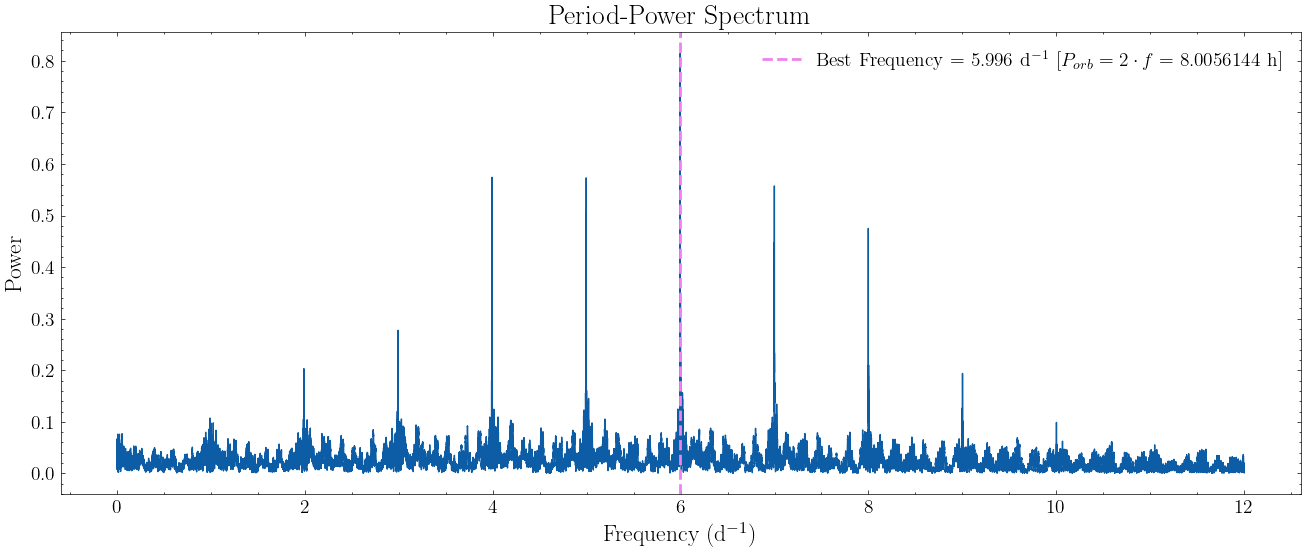

In [83]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(freqs, power)
ax.axvline(bestFreq.value, color='violet', linestyle='--', label=f"Best Frequency = {bestFreq.value:0.3f} d$^{{-1}}$ [$P_{{orb}} = 2 \\cdot f = $ {bestPeriod.to(u.hour)._repr_latex_()}]", linewidth=2, alpha=1)

ax.set_title("Period-Power Spectrum", fontsize=20)
ax.set_xlabel(r"Frequency ($\mathrm{d}^{-1}$)", fontsize=17)
ax.set_ylabel("Power", fontsize=17)
ax.tick_params(axis='both', labelsize=14)

ax.legend(fontsize=14)
print(f"Periodo: {bestPeriod.to(u.hour)} ({bestPeriod})")
print(f"Frecuencia: {1.0 / bestPeriod}")

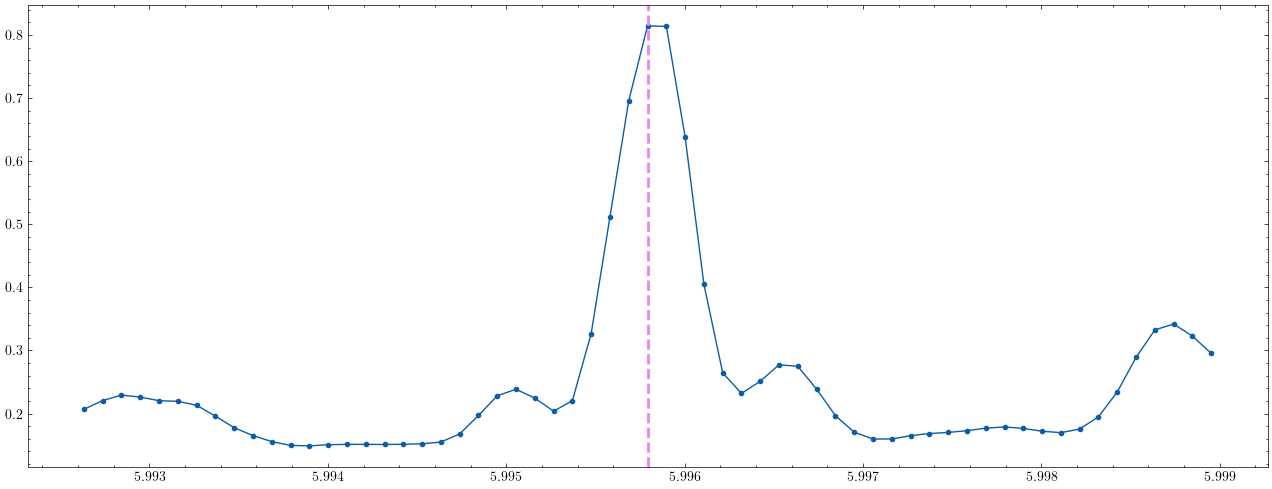

In [84]:
WINDOW_SIZE = 30

peakIdx = np.argmax(power)
freqWindow = freqs[peakIdx-WINDOW_SIZE:peakIdx+WINDOW_SIZE+1]
powerWindow = power[peakIdx-WINDOW_SIZE:peakIdx+WINDOW_SIZE+1]

plt.figure(figsize=(16, 6))
plt.plot(freqWindow, powerWindow, marker='.')
plt.axvline(freqs[peakIdx].value, color='violet', linestyle='--', label=f"Best Frequency = {bestFreq.value:0.3f} day$^{{-1}}$ [P={bestPeriod.to(u.hour):0.3f}]", linewidth=2, alpha=1)

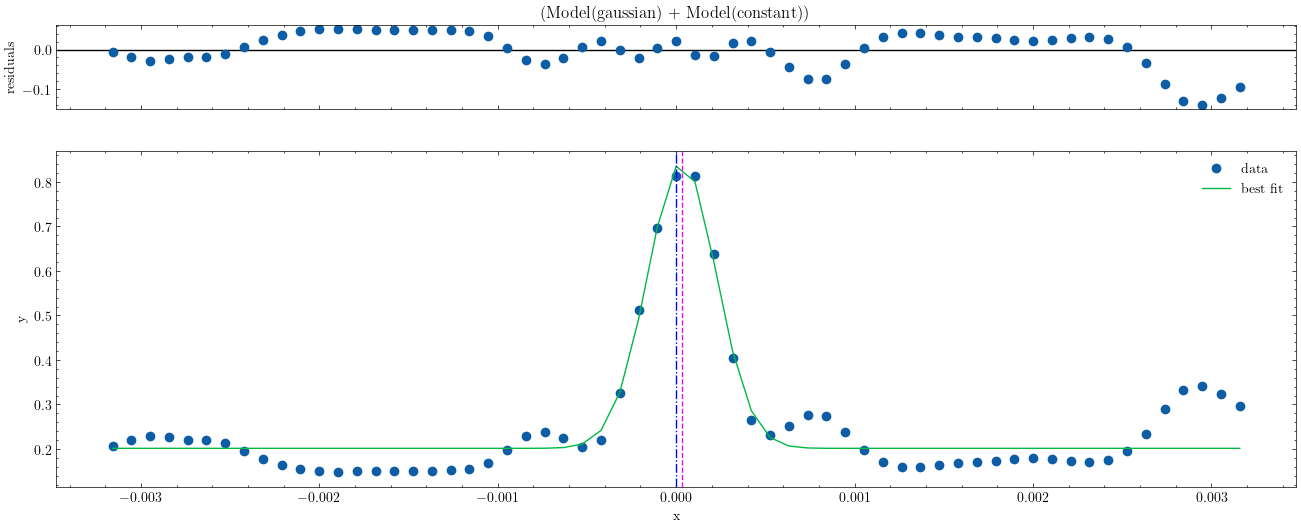

<Quantity 0.33356544 d>

In [116]:
SCALE_FACTOR = 1000

# model = GaussianModel() + ConstantModel()

# periodWindow = 1/freqWindow
# normalizedPeriodWindow = (periodWindow - np.median(periodWindow)) * SCALE_FACTOR
# fitResult: ModelResult = model.fit(powerWindow, x=normalizedPeriodWindow)

# fitResult.plot(fig_kws=dict(figsize=(16, 6)))
# fitSigma = (fitResult.best_values['sigma']/SCALE_FACTOR) * (u.day)
# maxDisplacedPeriod = (2/freqs[peakIdx]) + fitSigma
# print(f"Std: {(maxDisplacedPeriod - bestPeriod)} ({(maxDisplacedPeriod - bestPeriod).to(u.hour)})")
# print(f"Model period: {maxDisplacedPeriod*u.hour} | LS period: {bestPeriod}")
# fitResult

bestPeriod_all = 2/fit_gaussian(freqWindow, powerWindow)
bestPeriod_all

## ZTF data only (SAME PERIOD OBTAINED)

In [119]:
ztfModel = LombScargleMultiband.from_timeseries(observationsTs, 
                                             signal_column=ztfMagCols,
                                             uncertainty_column=ztfErrCols,
                                             band_labels=ztfBands)

freqs_ztf, power_ztf = ztfModel.autopower(normalization='psd', maximum_frequency=MAX_FREQ)

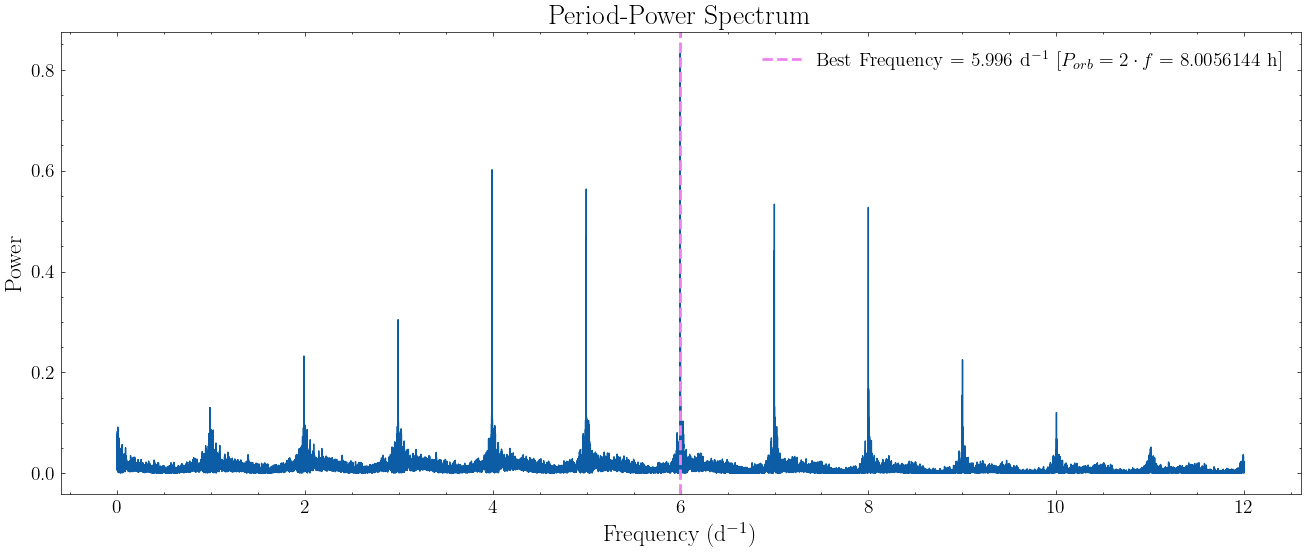

In [121]:
bestFreq_idx_ztf = np.argmax(power_ztf)
raw_bestFreq_ztf = freqs_ztf[bestFreq_idx_ztf]
raw_bestPeriod_ztf: u.Unit = 2.0 / raw_bestFreq_ztf

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(freqs_ztf, power_ztf)
ax.axvline(raw_bestFreq_ztf.value, color='violet', linestyle='--', label=f"Best Frequency = {raw_bestFreq_ztf.value:0.3f} d$^{{-1}}$ [$P_{{orb}} = 2 \\cdot f = $ {raw_bestPeriod_ztf.to(u.hour)._repr_latex_()}]", linewidth=2, alpha=1)

ax.set_title("Period-Power Spectrum", fontsize=20)
ax.set_xlabel(r"Frequency ($\mathrm{d}^{-1}$)", fontsize=17)
ax.set_ylabel("Power", fontsize=17)
ax.tick_params(axis='both', labelsize=14)

ax.legend(fontsize=14)

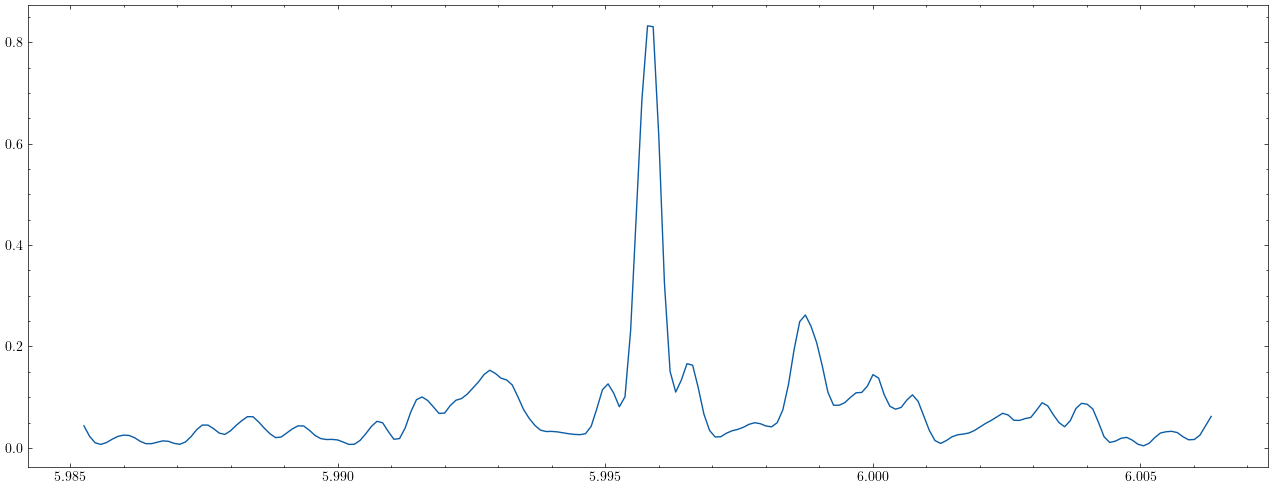

In [123]:
WINDOW_SIZE_ZTF = 100
freqWindow_ztf = freqs_ztf[bestFreq_idx_ztf-WINDOW_SIZE_ZTF:bestFreq_idx_ztf+WINDOW_SIZE_ZTF+1]
powerWindow_ztf = power_ztf[bestFreq_idx_ztf-WINDOW_SIZE_ZTF:bestFreq_idx_ztf+WINDOW_SIZE_ZTF+1]

plt.figure(figsize=(16, 6))
plt.plot(freqWindow_ztf, powerWindow_ztf)

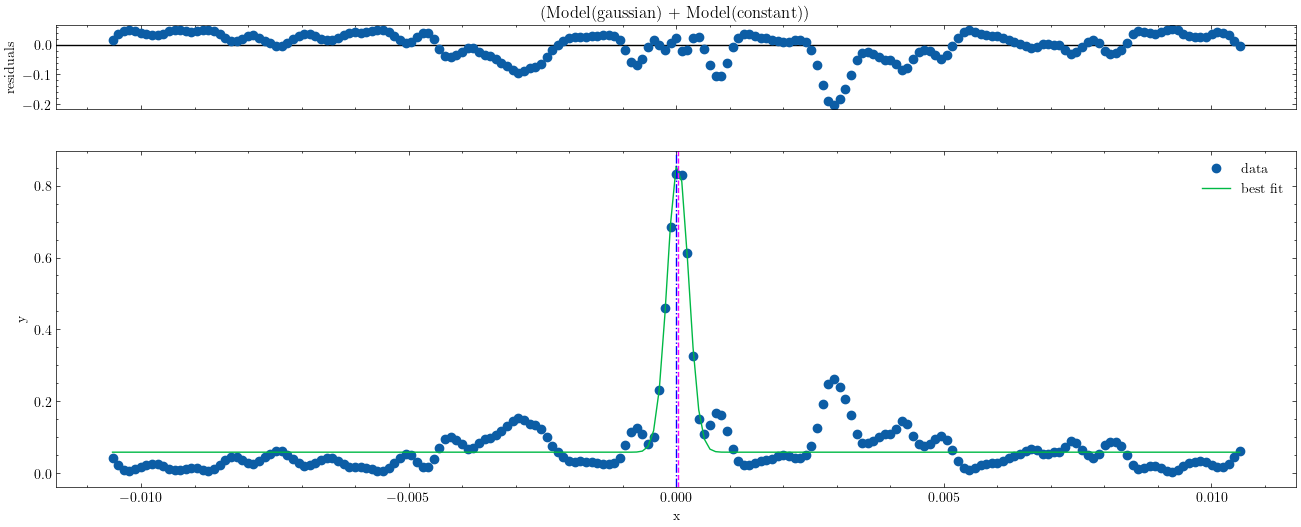

<Quantity 0.33356549 d>

In [124]:
bestPeriod_ztf = 2/fit_gaussian(freqWindow_ztf, powerWindow_ztf)
bestPeriod_ztf

In [125]:
bestPeriod_ztf, bestPeriod_all, bestPeriod_all - bestPeriod_ztf

(<Quantity 0.33356549 d>,
 <Quantity 0.33356544 d>,
 <Quantity -4.38282706e-08 d>)

# Period change ($O - C$)

In [88]:
%%script echo "skipping; can't use ZTF data, probably need to pull TESS if available"
from seismolab.OC import OCFitter

# will only use ZTF:r due to highest density and large time coverage
ocTs = observationsTs.copy()
ocTs.remove_rows([i for i, m in enumerate(ocTs['zg_mag'].mask & ocTs['zr_mag'].mask) if m])

plt.scatter(ocTs.time.value, ocTs['mag'], marker='.', s=0.08)
plt.show()

fitter = OCFitter(ocTs.time.value, ocTs['mag'], ocTs['err'], bestPeriod.value)
mintimes, mintimes_err = fitter.fit_minima(showfirst=True)
midtimes, oc, oc_err = fitter.calculate_OC(showplot=True)

skipping; can't use ZTF data, probably need to pull TESS if available


# Phase Plot

Adopted period: 0.3335654429468558 d (8.00557063072454 h)


/tmp/ipykernel_11762/2079121503.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


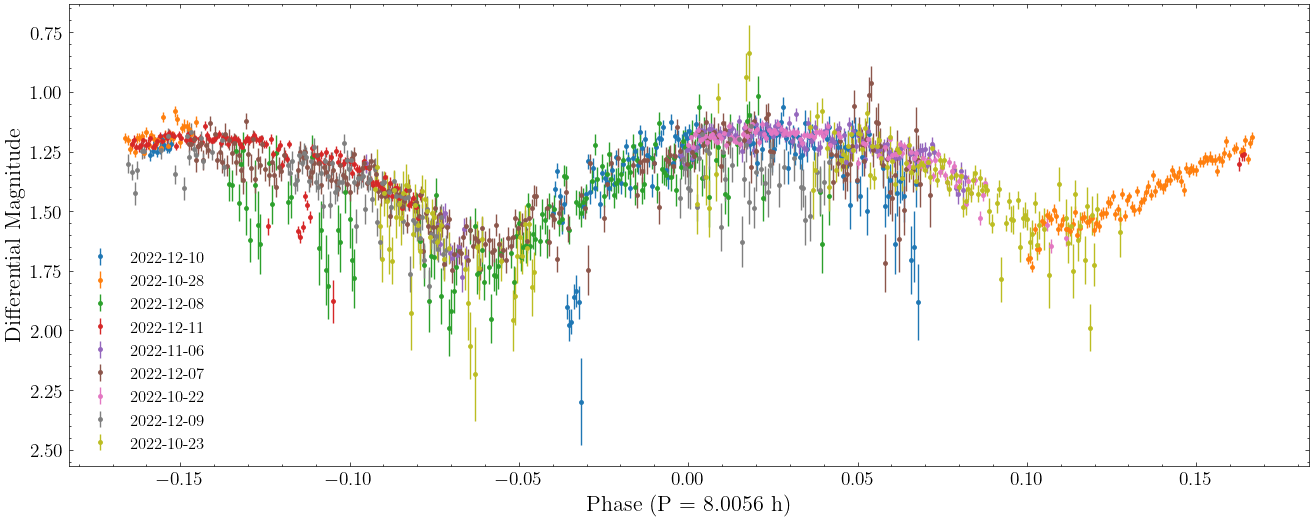

In [126]:
from matplotlib import cm

# period = bestPeriod
# period = maxDisplacedPeriod
period = bestPeriod_all
print(f"Adopted period: {period} ({period.to(u.hour)})")
foldedTs = observationsTs.fold(period=period)

# tsObsvDates = atoDiffMag['obsv_date'].unique()
tsObsvDates = {d for d in atoDiffMag['obsv_date']}

cmap = cm.get_cmap('tab10')
dateColors = [cmap(c) for c in np.linspace(0.001, 1, len(tsObsvDates), endpoint=False)]

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
for obsvDate, color in zip(tsObsvDates, dateColors):
    obsvPoints = foldedTs[foldedTs['obsv_date'] == obsvDate]
    ax.errorbar(obsvPoints.time.value, obsvPoints['iturbide_mag'].unmasked, obsvPoints['iturbide_err'].unmasked, fmt='.', color=color, markersize=5, label=obsvDate)
ax.legend(fontsize=12)

ax.set_xlabel(f"Phase (P = {period.value * 24:.4f} h)", fontsize=16)
ax.set_ylabel("Differential Magnitude", fontsize=16)

ax.tick_params(labelsize=14)
ax.invert_yaxis()

Text(0, 0.5, 'Magnitude')

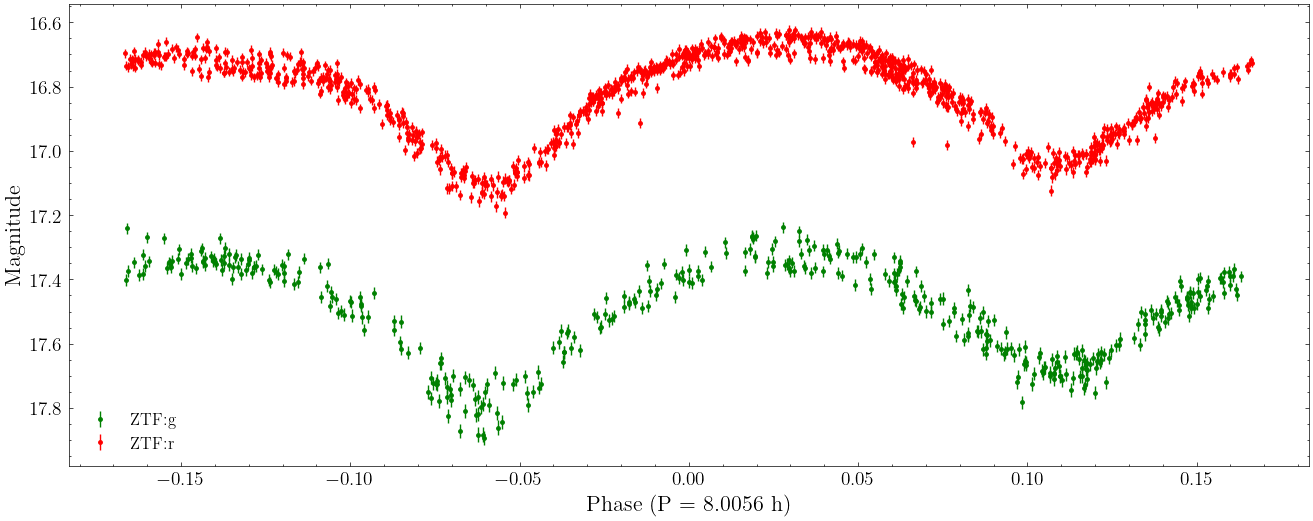

In [127]:
# gaia plot
# gaiaColors = {
#     "Gaia:G": 'g',
#     "Gaia:RP": 'r',
#     "Gaia:BP": 'b'
# }
# plt.figure(figsize=(16, 6))
# for band, fluxCol, errCol in zip(gaiaBands, gaiaFluxCols, gaiaErrCols):
#     bandData = foldedTs[foldedTs['band'] == band]
#     plt.errorbar(bandData.time, bandData[fluxCol], bandData[errCol], marker='.', linestyle='none', c=gaiaColors[band], label=band, markersize=5)
# plt.legend(fontsize=12)
# plt.gca().tick_params(axis='both', labelsize=14)
# plt.ylabel(r"Flux $(\mathrm{e}^{-} \ \mathrm{s}^{-1})$", fontsize=16)
# plt.xlabel(f"Phase (P = {period.value * 24:.2f} h)", fontsize=16)

ztfColors = {
    "ZTF:g": 'g',
    "ZTF:r": 'r'
}
plt.figure(figsize=(16, 6))
for band, fluxCol, errCol in zip(ztfBands, ztfMagCols, ztfErrCols):
    bandData = foldedTs[foldedTs['filter'] == band]
    plt.errorbar(bandData.time.value, bandData[fluxCol].unmasked, bandData[errCol].unmasked, marker='.', linestyle='none', c=ztfColors[band], label=band, markersize=5)
plt.legend(fontsize=12)
plt.gca().tick_params(axis='both', labelsize=14)
plt.gca().invert_yaxis()
plt.xlabel(f"Phase (P = {period.value * 24:.4f} h)", fontsize=16)
plt.ylabel("Magnitude", fontsize=16)

# Data clean

Applying windowed median filter to eliminate worst observations.

In [128]:
from scipy.ndimage import median_filter

def median_filter_mask(vals: np.ndarray, xi_low: float, xi_high: float, filter_size: int, boundary_val: float = None) -> tuple[np.ndarray, np.ndarray, float]:
    """
    Returns the filter mask, baseline calculated from the median filter, and the sigma calculated
    """
    sigma = np.std(vals)
    baseline = median_filter(vals, size=filter_size, mode='constant', cval=(np.median(vals) if not boundary_val else boundary_val))

    fltrLow = (vals - baseline > (-xi_low)*sigma)
    fltrHigh = (vals - baseline < xi_high*sigma) 
    return fltrLow & fltrHigh, baseline, sigma

In [129]:
foldedTs.sort('time')
foldedTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err
,mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64
-0.16651404268194697,16.6965179,0.014166302,ZTF:r,2458373.7919823187,--,--,26.2457829,———,———,16.6965179,———,———,0.014166302
-0.16635495227284516,17.4029655,0.0183366165,ZTF:g,2459855.823404422,--,--,26.3760471,———,17.4029655,———,———,0.0183366165,———
-0.16629533845658717,16.7348652,0.0143392617,ZTF:r,2458758.7267221836,--,--,26.1436615,———,———,16.7348652,———,———,0.0143392617
-0.16625800666293636,1.1924000000000028,0.0206155281280883,Iturbide:Luminance,2459880.8409095886,0.0033265785694365207,2022-10-28,———,1.1924000000000028,———,———,0.0206155281280883,———,———
-0.16605138076515136,17.2404938,0.017265521,ZTF:g,2459894.8508648183,--,--,26.2250042,———,17.2404938,———,———,0.017265521,———
-0.16575483394921772,16.7391777,0.014359097,ZTF:r,2458751.7223883863,--,--,26.0949039,———,———,16.7391777,———,———,0.014359097
-0.16571271684552666,17.3737259,0.0181318633,ZTF:g,2459171.6813231735,--,--,26.2424183,———,17.3737259,———,———,0.0181318633,———
-0.16555921103596696,1.2027999999999999,0.0206155281280883,Iturbide:Luminance,2459880.841608384,0.0033265544398984777,2022-10-28,———,1.2027999999999999,———,———,0.0206155281280883,———,———


## ZTF

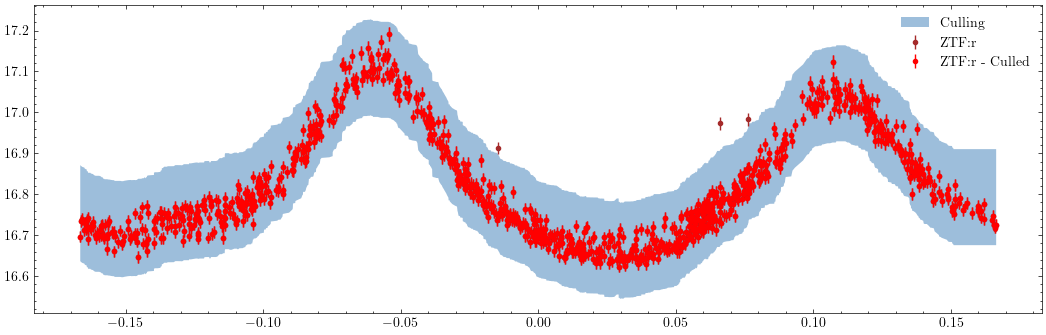

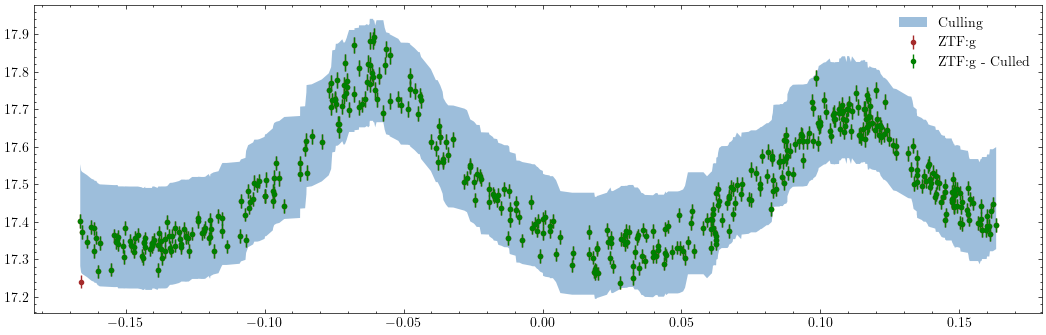

time,mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err
,mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64
-0.16651404268194697,16.6965179,0.014166302,ZTF:r,2458373.7919823187,--,--,26.2457829,———,———,16.6965179,———,———,0.014166302
-0.16629533845658717,16.7348652,0.0143392617,ZTF:r,2458758.7267221836,--,--,26.1436615,———,———,16.7348652,———,———,0.0143392617
-0.16575483394921772,16.7391777,0.014359097,ZTF:r,2458751.7223883863,--,--,26.0949039,———,———,16.7391777,———,———,0.014359097
-0.16504384171694048,16.7130547,0.0142401345,ZTF:r,2459065.9417466344,--,--,26.2716789,———,———,16.7130547,———,———,0.0142401345
-0.16484223617434074,16.7309647,0.0143213868,ZTF:r,2458750.722604655,--,--,26.0897923,———,———,16.7309647,———,———,0.0143213868
-0.16446316795675148,16.7148094,0.0142480358,ZTF:r,2458749.7222873946,--,--,26.1135921,———,———,16.7148094,———,———,0.0142480358
-0.16436731912844055,16.7182598,0.0142636076,ZTF:r,2459169.6812759135,--,--,26.3187504,———,———,16.7182598,———,———,0.0142636076
-0.1641791002209735,16.7365074,0.0143468045,ZTF:r,2458763.732320066,--,--,26.1384106,———,———,16.7365074,———,———,0.0143468045


In [130]:
cleanedZtfRawTs = []
for band in pd.unique(foldedTs['filter']):
    if 'ZTF' not in band:
        continue

    bandCol = 'zg' if band == 'ZTF:g' else 'zr'
    bandFoldedTs = foldedTs[foldedTs['filter'] == band].copy()

    xi_low = 0.8 if band == 'ZTF:r' else 0.8
    xi_high = 1 if band == 'ZTF:r' else 1
    fltr, baseline, initSigma = median_filter_mask(bandFoldedTs['mag'].value, xi_low, xi_high, filter_size=round(len(bandFoldedTs)/20))

    plt.figure(figsize=(13, 4))
    plt.errorbar(bandFoldedTs.time.value, bandFoldedTs['mag'].value, bandFoldedTs['err'].value, marker='.', ls='none', c='brown', label=band)
    plt.errorbar(bandFoldedTs.time.value[fltr], bandFoldedTs['mag'].value[fltr], bandFoldedTs['err'].value[fltr], marker='.', ls='none', c=ztfColors[band], label=f"{band} - Culled")
    plt.fill_between(bandFoldedTs.time.value, baseline - (xi_low*initSigma), baseline + (xi_high*initSigma), alpha=0.4, label="Culling")
    
    # DON'T INVERT; need it this way for properly plotting the culling region
    # plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

    bandFoldedTs.remove_rows([i for i, m in enumerate(fltr) if not m])
    cleanedZtfRawTs.append(bandFoldedTs)
cleanedZtfTs = vstack(cleanedZtfRawTs)
cleanedZtfTs

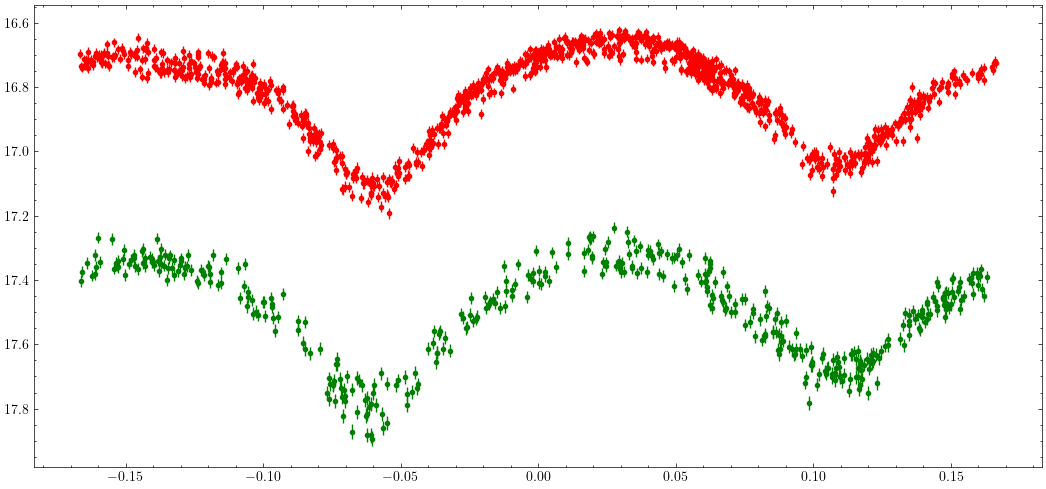

In [131]:
plt.figure(figsize=(13, 6))
for band in pd.unique(foldedTs['filter']):
    if 'ZTF' not in band:
        continue
    bandTs = cleanedZtfTs[cleanedZtfTs['filter'] == band]
    plt.errorbar(bandTs.time.value, bandTs['mag'].value, bandTs['err'].value, marker='.', ls='none', c=ztfColors[band], label=band)

plt.gca().invert_yaxis()

## Iturbide

Before applying windowed median filter, first try to discard observations based on the reported magnitude error.

In [132]:
iturbideCleanedFoldedTs = foldedTs.copy()
iturbideCleanedFoldedTs = iturbideCleanedFoldedTs[iturbideCleanedFoldedTs['filter'] == 'Iturbide:Luminance']

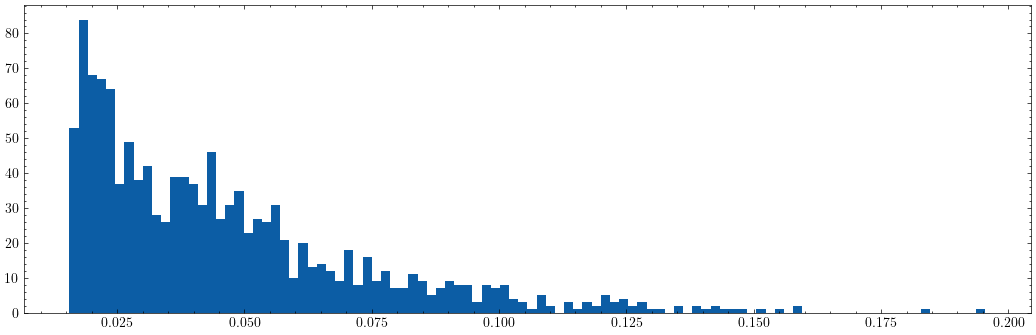

In [133]:
plt.figure(figsize=(13, 4))
plt.hist(iturbideCleanedFoldedTs['err'], bins=100)
plt.show()

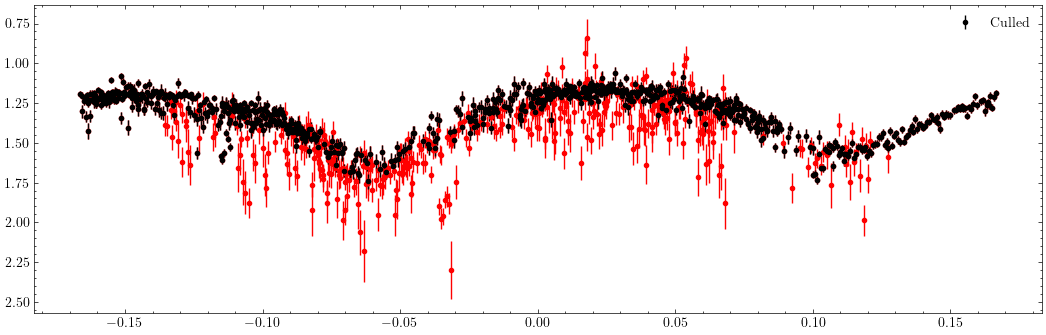

In [134]:
ERR_CUTOFF = 0.05
errMask = iturbideCleanedFoldedTs['err'].value < ERR_CUTOFF

plt.figure(figsize=(13, 4))
plt.errorbar(iturbideCleanedFoldedTs.time.value, iturbideCleanedFoldedTs['mag'], iturbideCleanedFoldedTs['err'], marker='.', ls='none', c='red')
plt.errorbar(iturbideCleanedFoldedTs[errMask].time.value, iturbideCleanedFoldedTs[errMask]['mag'], iturbideCleanedFoldedTs[errMask]['err'], marker='.', ls='none', c='black', label='Culled')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

iturbideCleanedFoldedTs = iturbideCleanedFoldedTs[errMask]

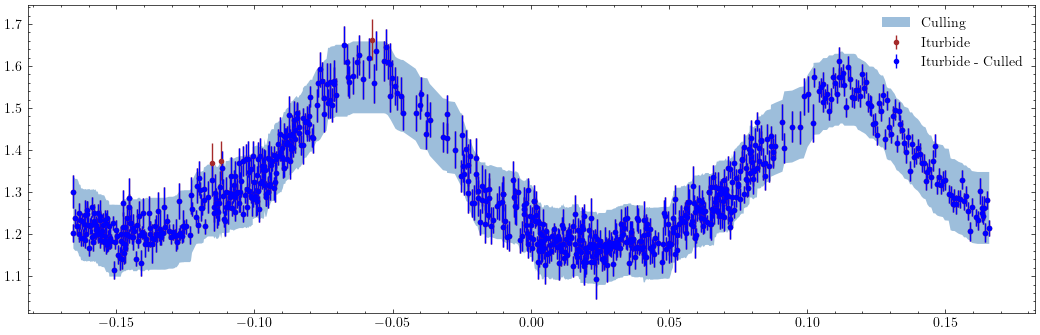

In [140]:
xi_low = 0.7
xi_high = 0.7
fltr, baseline, initSigma = median_filter_mask(iturbideCleanedFoldedTs['mag'].value, xi_low, xi_high, filter_size=round(len(iturbideCleanedFoldedTs['mag'])/30))

plt.figure(figsize=(13, 4))
plt.errorbar(iturbideCleanedFoldedTs.time.value, iturbideCleanedFoldedTs['mag'].value, iturbideCleanedFoldedTs['err'].value, marker='.', ls='none', c='brown', label='Iturbide')
plt.errorbar(iturbideCleanedFoldedTs.time.value[fltr], iturbideCleanedFoldedTs['mag'].value[fltr], iturbideCleanedFoldedTs['err'].value[fltr], marker='.', ls='none', c='blue', label="Iturbide - Culled")
plt.fill_between(iturbideCleanedFoldedTs.time.value, baseline - (xi_low*initSigma), baseline + (xi_high*initSigma), alpha=0.4, label="Culling")
plt.legend()
plt.show()

iturbideCleanedFoldedTs = iturbideCleanedFoldedTs[fltr]

# Normalized flux

In [193]:
# since phases are no longer normalized and they go from -period/2 to period/2
def findClosestQuarterPhaseIdx(foldedTs: TimeSeries) -> int:
	diff = np.abs(foldedTs.time.value - (bestPeriod.value/4))
	return np.argmin(diff)

## Iturbide

In [194]:
quarterPhaseIdx = findClosestQuarterPhaseIdx(iturbideCleanedFoldedTs)
quarterPhaseMag = iturbideCleanedFoldedTs['mag'][quarterPhaseIdx]

iturbideCleanedFoldedTs['norm_flux'] = 10**(-(2/5) * (iturbideCleanedFoldedTs['mag'].value - quarterPhaseMag.value))
iturbideCleanedFoldedTs['norm_ferr'] = (iturbideCleanedFoldedTs['norm_flux'] * iturbideCleanedFoldedTs['err'] * np.log(10)) / 2.5

iturbideCleanedFoldedTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,norm_flux,norm_ferr
,mag,mag,,,,,,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64
-0.16555921103596696,1.2027999999999999,0.0206155281280883,Iturbide:Luminance,2459880.841608384,0.0033265544398984777,2022-10-28,1.2238269144863219,0.023237539716311435
-0.16553179649135855,1.3013000000000012,0.03956008088970497,Iturbide:Luminance,2459922.5373161673,0.0012063471745832476,2022-12-09,1.11768648628847,0.04072422713098342
-0.16485659525682392,1.2391000000000005,0.0206155281280883,Iturbide:Luminance,2459880.842311,0.003326530177332098,2022-10-28,1.1835864919618604,0.022473470544809505
-0.16438512338479333,1.2182999999999993,0.0206155281280883,Iturbide:Luminance,2459924.539855498,0.0010780078240699316,2022-12-11,1.2064796473587158,0.022908156693209343
-0.16415768927415098,1.2197999999999993,0.0206155281280883,Iturbide:Luminance,2459880.843009906,0.003326506041772801,2022-10-28,1.2048139849918464,0.02287652975728733
-0.16368127902649388,1.1997999999999998,0.01969771560359221,Iturbide:Luminance,2459924.540559342,0.0010779623057632398,2022-12-11,1.2272131493198564,0.02226442803910769
-0.16345889318482817,1.251100000000001,0.022472205054244233,Iturbide:Luminance,2459880.8437087024,0.0033264819089261146,2022-10-28,1.170577035963137,0.024228212220124983
-0.16298518417095706,1.2329000000000008,0.01969771560359221,Iturbide:Luminance,2459924.5412554373,0.0010779172855032103,2022-12-11,1.19036459177042,0.021595911686949115


/tmp/ipykernel_11762/2936525819.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


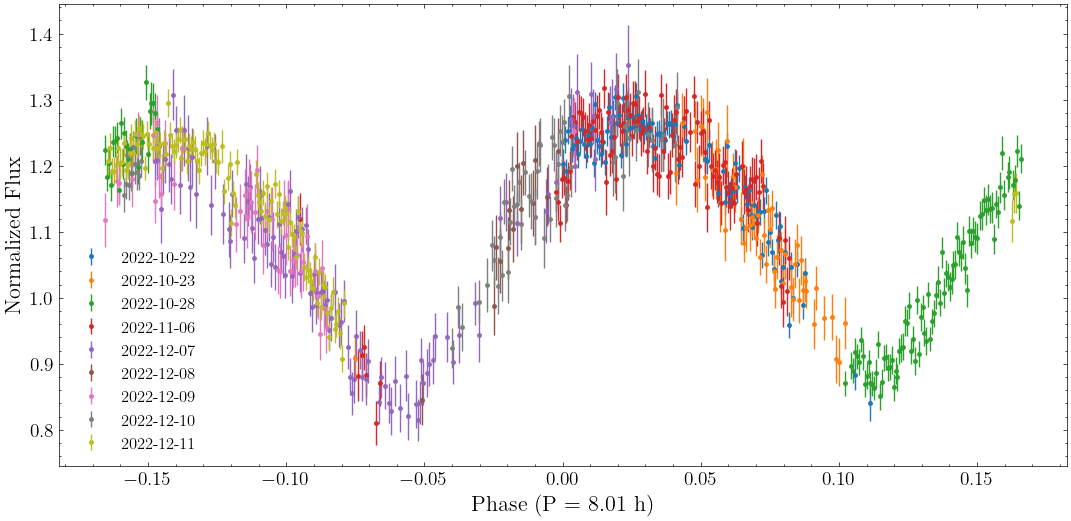

In [195]:
from matplotlib import cm

tsObsvDates = np.unique(atoDiffMag['obsv_date'])

cmap = cm.get_cmap('tab10')
dateColors = [cmap(c) for c in np.linspace(0.001, 1, len(tsObsvDates), endpoint=False)]

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
for obsvDate, color in zip(tsObsvDates, dateColors):
    obsvPoints = iturbideCleanedFoldedTs[iturbideCleanedFoldedTs['obsv_date'] == obsvDate]
    ax.errorbar(obsvPoints.time.value, obsvPoints['norm_flux'].value, obsvPoints['norm_ferr'].value, fmt='.', color=color, markersize=5, label=obsvDate)
ax.legend(fontsize=12)

ax.set_xlabel(f"Phase (P = {period.value * 24:.2f} h)", fontsize=16)
ax.set_ylabel("Normalized Flux", fontsize=16)

ax.tick_params(labelsize=14)

## ZTF

In [196]:
normFluxStack = []
for band in ['ZTF:g', 'ZTF:r']:
    bandData = cleanedZtfTs[cleanedZtfTs['filter'] == band].copy()
    bandMag = bandData['mag'].value
    quarterPhaseMag = bandMag[findClosestQuarterPhaseIdx(bandData)]
    bandData['norm_flux'] = 10**(-(2/5) * (bandData['mag'].value - quarterPhaseMag))
    bandData['norm_ferr'] = (bandData['norm_flux'] * bandData['err'] * np.log(10)) / 2.5
    normFluxStack.append(bandData)
cleanedZtfFluxTs = vstack(normFluxStack)
cleanedZtfFluxTs = cleanedZtfFluxTs[cleanedZtfFluxTs['magzp'].unmasked.value < 27]
cleanedZtfFluxTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err,norm_flux,norm_ferr
,mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag,,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.16635495227284516,17.4029655,0.0183366165,ZTF:g,2459855.823404422,--,--,26.3760471,———,17.4029655,———,———,0.0183366165,———,1.0748268824054272,0.018152372795700807
-0.16571271684552666,17.3737259,0.0181318633,ZTF:g,2459171.6813231735,--,--,26.2424183,———,17.3737259,———,———,0.0181318633,———,1.1041659745512657,0.018439641621359425
-0.1639303101681793,17.347332,0.0179516952,ZTF:g,2459059.938682193,--,--,26.4026089,———,17.347332,———,———,0.0179516952,———,1.1313368155295236,0.018705661275658557
-0.16235914135922513,17.3862724,0.0182190519,ZTF:g,2459853.8260075753,--,--,26.4263515,———,17.3862724,———,———,0.0182190519,———,1.0914799441631682,0.018315433954740255
-0.16127007469252327,17.3823967,0.0181920044,ZTF:g,2459153.6732318965,--,--,26.4453449,———,17.3823967,———,———,0.0181920044,———,1.0953831096376578,0.018353642683079867
-0.16126194233193403,17.3224964,0.0177861098,ZTF:g,2459402.84662591,--,--,26.3122578,———,17.3224964,———,———,0.0177861098,———,1.1575137535579465,0.01896194179172473
-0.16061481399763297,17.358345,0.018026337,ZTF:g,2459068.9482646487,--,--,26.429224,———,17.358345,———,———,0.018026337,———,1.1199192766000492,0.018593874096043437
-0.16010243389899706,17.2687778,0.0174406506,ZTF:g,2458388.80883886,--,--,26.3095112,———,17.2687778,———,———,0.0174406506,———,1.2162240862985692,0.01953673392070678


In [197]:
cleanedZtfFluxTs['flux'] = 10**(-(2/5) * (cleanedZtfFluxTs['mag'].value - cleanedZtfFluxTs['magzp'].value))
cleanedZtfFluxTs['ferr'] = (cleanedZtfFluxTs['flux'] * cleanedZtfFluxTs['err'] * np.log(10)) / 2.5
cleanedZtfFluxTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,magzp,iturbide_mag,zg_mag,zr_mag,iturbide_err,zg_err,zr_err,norm_flux,norm_ferr,flux,ferr
,mag,mag,,,,,mag,mag,mag,mag,mag,mag,mag,,mag,,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.16635495227284516,17.4029655,0.0183366165,ZTF:g,2459855.823404422,--,--,26.3760471,———,17.4029655,———,———,0.0183366165,———,1.0748268824054272,0.018152372795700807,3883.58343514,65.58847331783878
-0.16571271684552666,17.3737259,0.0181318633,ZTF:g,2459171.6813231735,--,--,26.2424183,———,17.3737259,———,———,0.0181318633,———,1.1041659745512657,0.018439641621359425,3527.58071756,58.91082112787078
-0.1639303101681793,17.347332,0.0179516952,ZTF:g,2459059.938682193,--,--,26.4026089,———,17.347332,———,———,0.0179516952,———,1.1313368155295236,0.018705661275658557,4189.00385473,69.26150206852135
-0.16235914135922513,17.3862724,0.0182190519,ZTF:g,2459853.8260075753,--,--,26.4263515,———,17.3862724,———,———,0.0182190519,———,1.0914799441631682,0.018315433954740255,4130.77595163,69.31593615489366
-0.16127007469252327,17.3823967,0.0181920044,ZTF:g,2459153.6732318965,--,--,26.4453449,———,17.3823967,———,———,0.0181920044,———,1.0953831096376578,0.018353642683079867,4218.70618825,70.6863427806577
-0.16126194233193403,17.3224964,0.0177861098,ZTF:g,2459402.84662591,--,--,26.3122578,———,17.3224964,———,———,0.0177861098,———,1.1575137535579465,0.01896194179172473,3943.70626167,64.60426785222208
-0.16061481399763297,17.358345,0.018026337,ZTF:g,2459068.9482646487,--,--,26.429224,———,17.358345,———,———,0.018026337,———,1.1199192766000492,0.018593874096043437,4249.63470433,70.55613230116217
-0.16010243389899706,17.2687778,0.0174406506,ZTF:g,2458388.80883886,--,--,26.3095112,———,17.2687778,———,———,0.0174406506,———,1.2162240862985692,0.01953673392070678,4133.26604199,66.39444144841066


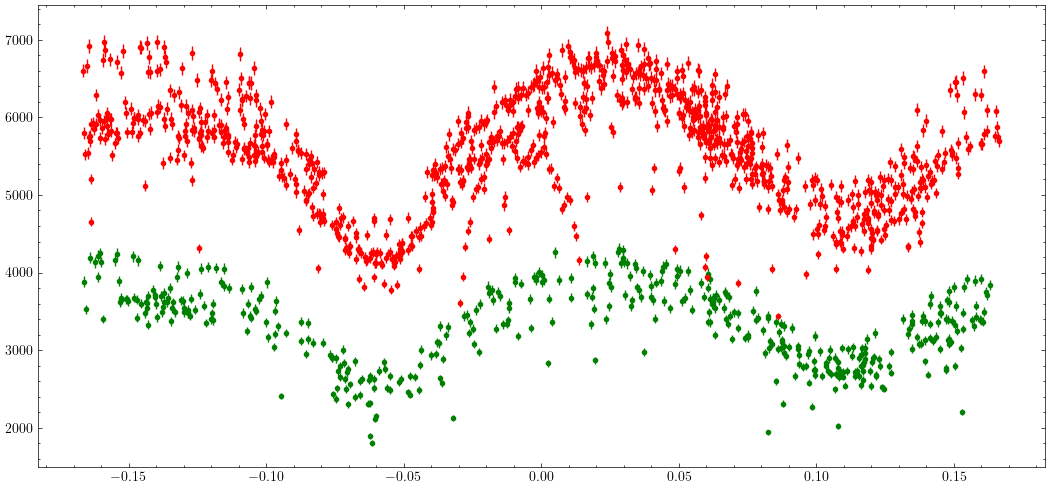

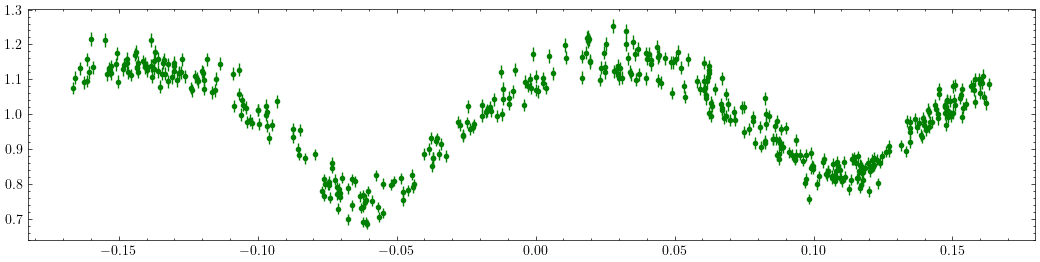

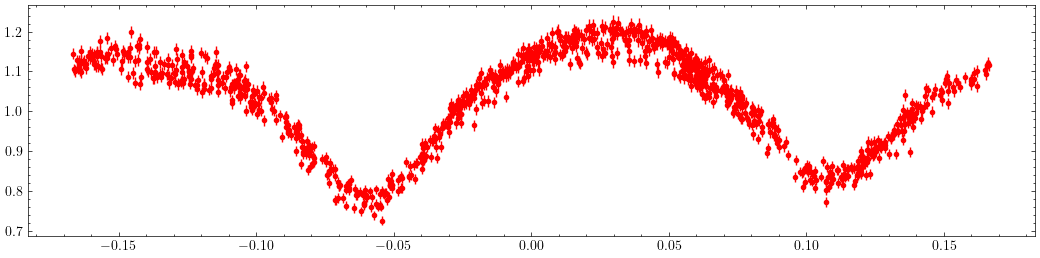

In [198]:
plt.figure(figsize=(13, 6))
for band in ['ZTF:g', 'ZTF:r']:
    bandData = cleanedZtfFluxTs[cleanedZtfFluxTs['filter'] == band]
    plt.errorbar(bandData.time.value, bandData['flux'].unmasked, bandData['ferr'].unmasked.value, ls='none', marker='.', c=ztfColors[band])

for band in ['ZTF:g', 'ZTF:r']:
    plt.figure(figsize=(13, 3))
    bandData = cleanedZtfFluxTs[cleanedZtfFluxTs['filter'] == band]
    plt.errorbar(bandData.time.value, bandData['norm_flux'], bandData['norm_ferr'].value, ls='none', marker='.', c=ztfColors[band])
plt.show()

In [199]:
ztf_minFlux_idx = np.argmin(cleanedZtfFluxTs['norm_flux'])
iturbide_minFlux_idx = np.argmin(iturbideCleanedFoldedTs['norm_flux'])

iturbide_minPhase = iturbideCleanedFoldedTs.time.value[iturbide_minFlux_idx]
ztf_minPhase = cleanedZtfFluxTs.time.value[ztf_minFlux_idx]
iturbide_minPhase, ztf_minPhase

(-0.06760292340154782, -0.06057903778380305)

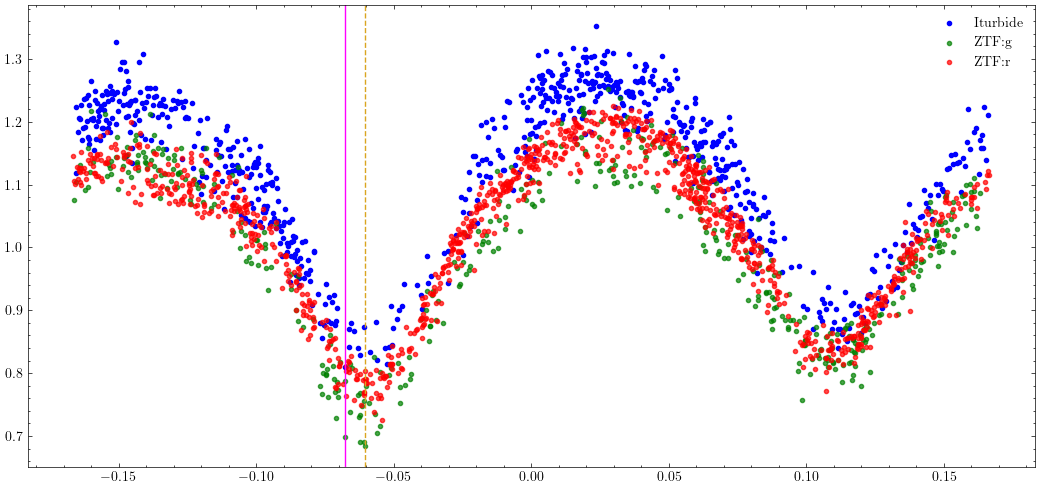

In [200]:
plt.figure(figsize=(13, 6))
plt.scatter(iturbideCleanedFoldedTs.time.value, iturbideCleanedFoldedTs['norm_flux'], marker='.', label='Iturbide', c='b')
for band in ['ZTF:g', 'ZTF:r']:
    bandData = cleanedZtfFluxTs[cleanedZtfFluxTs['filter'] == band]
    plt.scatter(bandData.time.value, bandData['norm_flux'].value, marker='.', c=ztfColors[band], label=band, alpha=0.7)
plt.axvline(iturbide_minPhase, c='magenta')
plt.axvline(ztf_minPhase, c='goldenrod', ls='--')
plt.legend()
plt.show()

# Write cleaned time series

For use in PHOEBE.

In [ ]:
iturbideCleanedFoldedTs.remove_columns(['iturbide_mag', 'iturbide_err', 'zg_mag', 'zr_mag', 'zg_err', 'zr_err', 'magzp'])
iturbideCleanedFoldedTs

time,mag,err,filter,hjd,ltt_corr,obsv_date,norm_flux,norm_ferr
,mag,mag,,,,,,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,str10,float64,float64
-0.16555921103596696,1.2027999999999999,0.0206155281280883,Iturbide:Luminance,2459880.841608384,0.0033265544398984777,2022-10-28,1.2238269144863219,0.023237539716311435
-0.16553179649135855,1.3013000000000012,0.03956008088970497,Iturbide:Luminance,2459922.5373161673,0.0012063471745832476,2022-12-09,1.11768648628847,0.04072422713098342
-0.16485659525682392,1.2391000000000005,0.0206155281280883,Iturbide:Luminance,2459880.842311,0.003326530177332098,2022-10-28,1.1835864919618604,0.022473470544809505
-0.16438512338479333,1.2182999999999993,0.0206155281280883,Iturbide:Luminance,2459924.539855498,0.0010780078240699316,2022-12-11,1.2064796473587158,0.022908156693209343
-0.16415768927415098,1.2197999999999993,0.0206155281280883,Iturbide:Luminance,2459880.843009906,0.003326506041772801,2022-10-28,1.2048139849918464,0.02287652975728733
-0.16368127902649388,1.1997999999999998,0.01969771560359221,Iturbide:Luminance,2459924.540559342,0.0010779623057632398,2022-12-11,1.2272131493198564,0.02226442803910769
-0.16345889318482817,1.251100000000001,0.022472205054244233,Iturbide:Luminance,2459880.8437087024,0.0033264819089261146,2022-10-28,1.170577035963137,0.024228212220124983
-0.16298518417095706,1.2329000000000008,0.01969771560359221,Iturbide:Luminance,2459924.5412554373,0.0010779172855032103,2022-12-11,1.19036459177042,0.021595911686949115


In [214]:
iturbideCleanedFoldedTs.meta['period'] = period.value
iturbideCleanedFoldedTs.write(ITURBIDE_OUTPUT_PATH, overwrite=True)

In [204]:
cleanedZtfFluxTs.remove_columns(['obsv_date', 'iturbide_mag', 'iturbide_err', 'zg_mag', 'zr_mag', 'zg_err', 'zr_err'])
cleanedZtfFluxTs

time,mag,err,filter,hjd,ltt_corr,magzp,norm_flux,norm_ferr,flux,ferr
,mag,mag,,,,mag,,mag,,mag
TimeDelta,float64,float64,str18,Time,TimeDelta,float64,float64,float64,float64,float64
-0.16635495227284516,17.4029655,0.0183366165,ZTF:g,2459855.823404422,--,26.3760471,1.0748268824054272,0.018152372795700807,3883.58343514,65.58847331783878
-0.16571271684552666,17.3737259,0.0181318633,ZTF:g,2459171.6813231735,--,26.2424183,1.1041659745512657,0.018439641621359425,3527.58071756,58.91082112787078
-0.1639303101681793,17.347332,0.0179516952,ZTF:g,2459059.938682193,--,26.4026089,1.1313368155295236,0.018705661275658557,4189.00385473,69.26150206852135
-0.16235914135922513,17.3862724,0.0182190519,ZTF:g,2459853.8260075753,--,26.4263515,1.0914799441631682,0.018315433954740255,4130.77595163,69.31593615489366
-0.16127007469252327,17.3823967,0.0181920044,ZTF:g,2459153.6732318965,--,26.4453449,1.0953831096376578,0.018353642683079867,4218.70618825,70.6863427806577
-0.16126194233193403,17.3224964,0.0177861098,ZTF:g,2459402.84662591,--,26.3122578,1.1575137535579465,0.01896194179172473,3943.70626167,64.60426785222208
-0.16061481399763297,17.358345,0.018026337,ZTF:g,2459068.9482646487,--,26.429224,1.1199192766000492,0.018593874096043437,4249.63470433,70.55613230116217
-0.16010243389899706,17.2687778,0.0174406506,ZTF:g,2458388.80883886,--,26.3095112,1.2162240862985692,0.01953673392070678,4133.26604199,66.39444144841066


In [215]:
cleanedZtfFluxTs.meta['period'] = period.value
cleanedZtfFluxTs.write(CLEANED_ZTF_OUTPUT_PATH, overwrite=True)